In [88]:
import pandas as pd

sensus = {'tinggi': [158, 160, 180, 175, 168, 188, 190, 173, 156],
         'berat': [64, 50, 70, 60, 57, 73, 62, 83, 44],
         'jk': ['pria', 'pria', 'pria', 'pria', 'wanita', 'wanita', 'wanita', 'wanita', 'wanita', ]}

sensus_df = pd.DataFrame(sensus)
sensus_df

,tinggi,berat,jk
0,158,64,pria
1,160,50,pria
2,180,70,pria
3,175,60,pria
4,168,57,wanita
5,188,73,wanita
6,190,62,wanita
7,173,83,wanita
8,156,44,wanita


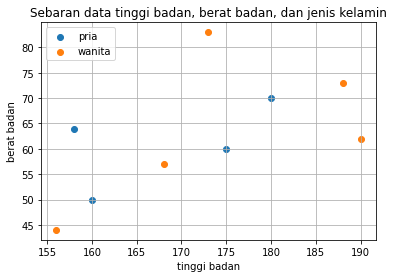

In [89]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for jk, d in sensus_df.groupby('jk'):
    ax.scatter(d['tinggi'], d['berat'], label=jk)

plt.legend(loc='upper left')
plt.title('Sebaran data tinggi badan, berat badan, dan jenis kelamin')
plt.xlabel('tinggi badan')
plt.ylabel('berat badan')
plt.grid()
plt.show()

In [90]:
# preprocessing dataset
import numpy as np

X_train = np.array(sensus_df[['tinggi', 'berat']])
y_train = np.array(sensus_df['jk'])
print(f'x_train : {X_train} \n')
print(f'y_train : {y_train}')

x_train : [[158  64]
 [160  50]
 [180  70]
 [175  60]
 [168  57]
 [188  73]
 [190  62]
 [173  83]
 [156  44]] 

y_train : ['pria' 'pria' 'pria' 'pria' 'wanita' 'wanita' 'wanita' 'wanita' 'wanita']


In [91]:
# karena data pada variabel target string/object maka kita akan menkoversi ke numerik terlebih dahulu agar mudah untuk dievaluasi
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
print(f'y_train {y_train}')

y_train [[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]]


In [92]:
# merubah y_train dari 2 dimensi menjadi 1 dimensi dikarenakan nilai dari data target haruslah 1 dimensi
y_train = y_train.flatten()
print(f'y_train : {y_train}')

y_train : [0 0 0 0 1 1 1 1 1]


In [96]:
# Training KNN clasification Model
from sklearn.neighbors import KNeighborsClassifier

K = 3
model = KNeighborsClassifier(n_neighbors=K)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [97]:
# lakukan prediksi berdasarkan data baru
tinggi_badan = 155
berat_badan = 70
X_new = np.array([tinggi_badan, berat_badan]).reshape(1, -1)
X_new

array([[155,  70]])

In [98]:
y_new = model.predict(X_new)
y_new

array([0])

In [99]:
lb.inverse_transform(y_new)

array(['pria'], dtype='<U6')

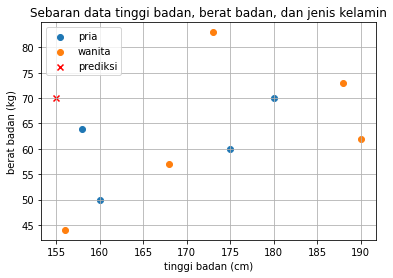

In [107]:
fig, ax = plt.subplots()
for jk, d in sensus_df.groupby('jk'):
    ax.scatter(d['tinggi'], d['berat'], label=jk)

plt.scatter(tinggi_badan,
           berat_badan,
           marker='x',
           color='red',
           label='prediksi')

plt.legend(loc='upper left')
plt.title('Sebaran data tinggi badan, berat badan, dan jenis kelamin')
plt.xlabel('tinggi badan (cm)')
plt.ylabel('berat badan (kg)')
plt.grid()
plt.show()

In [108]:
prediksi = np.array([tinggi_badan, berat_badan])
prediksi

array([155,  70])

In [109]:
X_train

array([[158,  64],
       [160,  50],
       [180,  70],
       [175,  60],
       [168,  57],
       [188,  73],
       [190,  62],
       [173,  83],
       [156,  44]], dtype=int64)

In [111]:
from scipy.spatial.distance import euclidean

data_jarak = [euclidean(prediksi, d) for d in X_train]
data_jarak

[6.708203932499369,
 20.615528128088304,
 25.0,
 22.360679774997898,
 18.384776310850235,
 33.13608305156178,
 35.90264614203248,
 22.20360331117452,
 26.019223662515376]

In [112]:
sensus_df['jarak'] = data_jarak
sensus_df.sort_values(['jarak'])

,tinggi,berat,jk,jarak
0,158,64,pria,6.708204
4,168,57,wanita,18.384776
1,160,50,pria,20.615528
7,173,83,wanita,22.203603
3,175,60,pria,22.360680
2,180,70,pria,25.000000
8,156,44,wanita,26.019224
5,188,73,wanita,33.136083
6,190,62,wanita,35.902646


In [142]:
# evaluasi 
X_test = np.array([[168,65], [180,96], [160,52], [169,67]])
y_test = lb.transform(np.array(['pria', 'pria', 'wanita', 'pria'])).flatten()

print(f'x_test : \n{X_test} \n')
print(f'y_test : {y_test}')

x_test : 
[[168  65]
 [180  96]
 [160  52]
 [169  67]] 

y_test : [0 0 1 0]


In [143]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, 0])

In [146]:
# metrics evaluasi dengan accuracy
# evaluasi ini menganggap berhasil prediksi apabila truly positive dan false positive
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)

print(f'Accuracy : {acc}')

Accuracy : 0.75


In [147]:
# metrics evaluasi dengan precision
# evaluasi ini hanya menganggap berhasil prediksi apabila truly positive
from sklearn.metrics import precision_score

prec = precision_score(y_test, y_pred)

print(f'Precision : {prec}')

Precision : 0.5


In [148]:
# metrics evaluasi dengan recall score
# evaluasi ini hanya menganggap berhasil prediksi apabila testing set kita benar-benar positif lalu kita dapat memprediksinya positif
from sklearn.metrics import recall_score

rec = recall_score(y_test, y_pred)

print(f'Recall : {rec}')

Recall : 1.0


In [149]:
# metrics evaluasi dengan f1 score
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)

print(f'F1 : {f1}')

F1 : 0.6666666666666666


In [151]:
# metrics evaluasi dengan classification_report
from sklearn.metrics import classification_report

cls_report = classification_report(y_test, y_pred)

print(f'Classification Report :\n {cls_report}')

Classification Report :
               precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.50      1.00      0.67         1

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4



In [153]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_test, y_pred)

print(f'matthews_corrcoef : {mcc}')

matthews_corrcoef : 0.5773502691896258
